In [1]:
#importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import string 
import re 
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short 
from gensim.models import Word2Vec
from sklearn import cluster 
from sklearn import metrics 
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [2]:
# I joined the title to text for a better result
df = pd.read_csv('news_datasets.csv')
df['text'] = df['title'] + ' ' + df['text']

In [3]:
# Add another column as the numeric values of the label
label_num = []
for value in df['label']:
    if value == 'REAL' : label_num.append(1)
    else: label_num.append(0)
df['label_num'] = label_num


In [4]:
df.head()

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,Kerry to go to Paris in gesture of sympathy U....,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,Bernie supporters on Twitter erupt in anger ag...,FAKE,0
4,875,The Battle of New York: Why This Primary Matters,The Battle of New York: Why This Primary Matte...,REAL,1


label
FAKE    3164
REAL    3171
Name: text, dtype: int64


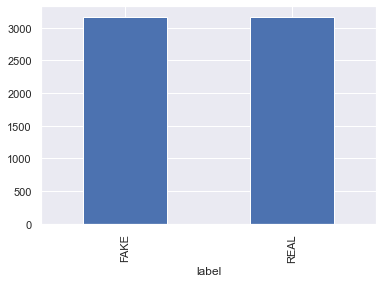

In [67]:
# Comparing fake and real news?
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

In [85]:
# plotting the 2d and 3d graphs to visualize the dataset
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan', 'tab:gray']
MARKERS = ['o', 'v', 's', '<', '>', '8', '^', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

def plot2d(X, y_pred, y_true, mode=None, centroids=None):
    transformer = None
    X_r = X
    
    if mode is not None:
        transformer = mode(n_components=2)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 2, 'plot2d only works with 2-dimensional data'


    plt.grid()
    for ix, iyp, iyt in zip(X_r, y_pred, y_true):
        plt.plot(ix[0], ix[1], 
                    c=COLORS[iyp], 
                    marker=MARKERS[iyt])
        
    if centroids is not None:
        C_r = centroids
        if transformer is not None:
            C_r = transformer.fit_transform(centroids)
        for cx in C_r:
            plt.plot(cx[0], cx[1], 
                        marker=MARKERS[-1], 
                        markersize=10,
                        c='red')

    plt.show()

def plot3d(X, y_pred, y_true, mode=None, centroids=None):
    transformer = None
    X_r = X
    if mode is not None:
        transformer = mode(n_components=3)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 3, 'plot2d only works with 3-dimensional data'

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.elev = 30
    ax.azim = 120

    for ix, iyp, iyt in zip(X_r, y_pred, y_true):
        ax.plot(xs=[ix[0]], ys=[ix[1]], zs=[ix[2]], zdir='z',
                    c=COLORS[iyp], 
                    marker=MARKERS[iyt])
        
    if centroids is not None:
        C_r = centroids
        if transformer is not None:
            C_r = transformer.fit_transform(centroids)
        for cx in C_r:
            ax.plot(xs=[cx[0]], ys=[cx[1]], zs=[cx[2]], zdir='z',
                        marker=MARKERS[-1], 
                        markersize=10,
                        c='red')
    plt.show()

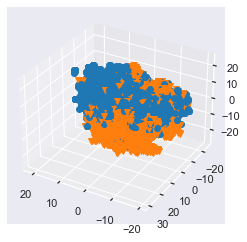

In [87]:
plot3d(X, y, y, TSNE)

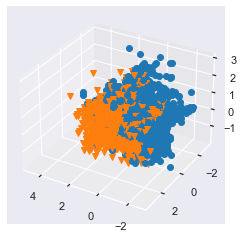

In [88]:
plot3d(X, y, y, PCA)

In [ ]:
 Apply the Word2Vec 

In [84]:
clean = [lambda x: x.lower(), strip_tags, strip_punctuation, 
                  strip_multiple_whitespaces, strip_numeric,
                  remove_stopwords, strip_short]

processed_data = []
processed_labels = []

for index, row in df.iterrows():
    words_broken_up = preprocess_string(row['text'], clean)
    # This eliminates any fields that may be blank after preprocessing
    if len(words_broken_up) > 0:
        processed_data.append(words_broken_up)
        processed_labels.append(row['label_num'])

In [6]:
model = Word2Vec(processed_data, min_count=1)

In [7]:
model.wv.most_similar("trump")

[('trump’s', 0.9047683477401733),
 ('“mainstreaming', 0.7438517212867737),
 ('rumsfeld', 0.7404940128326416),
 ('jeter', 0.7206736207008362),
 ('upâ€\x9d', 0.7183706760406494),
 ('juxtapose', 0.6991798281669617),
 ('obama…', 0.6764028072357178),
 ('“belgium', 0.6734293699264526),
 ('trump—and', 0.6730084419250488),
 ('trump”–', 0.6723860502243042)]

In [8]:
model.wv.most_similar("america")

[('country', 0.7263306379318237),
 ('nation', 0.6991192698478699),
 ('great', 0.6610617637634277),
 ('“make', 0.6520432233810425),
 ('conformed', 0.6460477113723755),
 ('“chairman', 0.636742353439331),
 ('soon…', 0.6360567212104797),
 ('“united”', 0.6240637898445129),
 ('coup\x94', 0.6234774589538574),
 ('serf’s', 0.6234768629074097)]

In [23]:
# Getting the vector of a sentence based on average of all the word vectors in the sentence
# We get the average as this accounts for different sentence lengths

def ReturnVector(x):
    try:
        return model[x]
    except:
        return np.zeros(100)
    
def Sentence_Vector(sentence):
    word_vectors = list(map(lambda x: ReturnVector(x), sentence))
    return np.average(word_vectors, axis=0).tolist()

X = []
for data_x in processed_data:
    X.append(Sentence_Vector(data_x))

<ipython-input-23-aa9e5d7d91e8>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return model[x]


In [24]:
X_np = np.array(X)
X_np.shape

(6335, 100)

In [25]:
kmeans = cluster.KMeans(n_clusters=2, verbose=1)
clustered = kmeans.fit_predict(X_np)

Initialization complete
Iteration 0, inertia 45685.35658286574
Iteration 1, inertia 27666.705801450007
Iteration 2, inertia 27370.475917454783
Iteration 3, inertia 26285.54655923069
Iteration 4, inertia 24474.27606450459
Iteration 5, inertia 23944.720285029733
Iteration 6, inertia 23828.052605237863
Iteration 7, inertia 23797.36125411408
Iteration 8, inertia 23788.86946639656
Iteration 9, inertia 23786.897197148435
Iteration 10, inertia 23786.621247635747
Iteration 11, inertia 23786.510677839284
Converged at iteration 11: center shift 3.1257795614941976e-06 within tolerance 4.672908599041123e-06.
Initialization complete
Iteration 0, inertia 46418.644975752904
Iteration 1, inertia 25224.776530781237
Iteration 2, inertia 24259.969600006076
Iteration 3, inertia 23894.623915972028
Iteration 4, inertia 23814.759513448636
Iteration 5, inertia 23793.80672366666
Iteration 6, inertia 23789.20654407134
Iteration 7, inertia 23788.243053124555
Iteration 8, inertia 23787.338467467394
Iteration 9, i

In [26]:
accuracy = {'text': processed_data, 'label': processed_labels, 'Predicted': clustered}
accuracy = pd.DataFrame(data=accuracy)

accuracy.head(10)

,text,label,Predicted
0,"[smell, hillary’s, fear, daniel, greenfield, s...",0,1
1,"[watch, exact, moment, paul, ryan, committed, ...",0,1
2,"[kerry, paris, gesture, sympathy, secretary, s...",1,0
3,"[bernie, supporters, twitter, erupt, anger, dn...",0,1
4,"[battle, new, york, primary, matters, primary,...",1,1
5,"[tehran, usa, i’m, immigrant, grandparents, ye...",0,0
6,"[girl, horrified, watches, boyfriend, left, fa...",0,0
7,"[‘britain’s, schindler’, dies, czech, stockbro...",1,0
8,"[fact, check, trump, clinton, commander, chief...",1,1
9,"[iran, reportedly, makes, new, push, uranium, ...",1,0


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])
score = accuracy_score(y,accuracy.Predicted)
print( 'Model Accuracy :', round(score*100,2) )

Model Accuracy : 66.91


In [28]:
confusion_matrix(y, accuracy.Predicted, labels=accuracy.label.unique())

array([[2359,  805],
       [1291, 1880]])

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

# Accuracy
print('Accuracy :',accuracy_score(y, accuracy.Predicted))
# Precision
print('Precision:',precision_score(y, accuracy.Predicted))
# Recall
print('Recall: ',recall_score(y, accuracy.Predicted))
# F1-score
print('F1-Score:',f1_score(y, accuracy.Predicted))

Accuracy : 0.6691397000789266
Precision: 0.7001862197392924
Recall:  0.5928729107537054
F1-Score: 0.6420765027322405


In [31]:
# PCA of text vectors
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X_np)
PCA_df = pd.DataFrame(pca_fit)
PCA_df['cluster'] = clustered
PCA_df.columns = ['x1','x2','cluster']

In [32]:
# T-SNE
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(pca_fit)

TSNE_df = pd.DataFrame(tsne_fit)
TSNE_df['cluster'] = clustered
TSNE_df.columns = ['x1','x2','cluster']

Text(0.5, 1.0, 'Visualized on PCA')

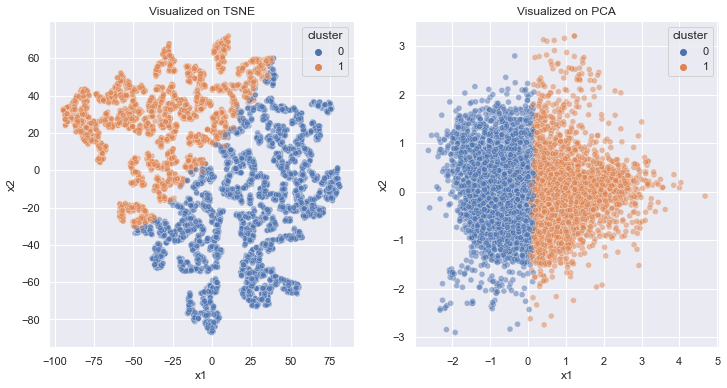

In [33]:
# Plots
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=PCA_df,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
sns.scatterplot(data=TSNE_df,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('TSNE')
ax[1].set_title('PCA')

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [103]:
# Apply TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df.text) 

In [104]:
kmeans.fit(X_tfidf)

Initialization complete
Iteration 0, inertia 12390.081372068906
Iteration 1, inertia 6103.225944277558
Iteration 2, inertia 6078.897081047007
Iteration 3, inertia 6063.264633163383
Iteration 4, inertia 6053.6643719765125
Iteration 5, inertia 6047.842393230762
Iteration 6, inertia 6045.88794076347
Iteration 7, inertia 6045.227278225818
Iteration 8, inertia 6044.995895803152
Iteration 9, inertia 6044.929387666035
Iteration 10, inertia 6044.903192695961
Iteration 11, inertia 6044.89221449413
Iteration 12, inertia 6044.8895760471405
Iteration 13, inertia 6044.8886791813475
Iteration 14, inertia 6044.886713037285
Iteration 15, inertia 6044.884028107823
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 12107.58897183565
Iteration 1, inertia 6093.542362414314
Iteration 2, inertia 6065.0004995694535
Iteration 3, inertia 6052.468080777279
Iteration 4, inertia 6046.89643835712
Iteration 5, inertia 6045.386216790832
Iteration 6, inertia 6044.993175035371


KMeans(n_clusters=2, verbose=1)

In [105]:
cluster_tfidf = kmeans.predict(X_tfidf)

In [106]:
accuracy = {'text': processed_data, 'label': processed_labels, 'Predicted': clustered, 'predict_tfidf':cluster_tfidf}
accuracy = pd.DataFrame(data=accuracy)

accuracy.head(10)

,text,label,Predicted,predict_tfidf
0,"[smell, hillary’s, fear, daniel, greenfield, s...",0,1,0
1,"[watch, exact, moment, paul, ryan, committed, ...",0,1,1
2,"[kerry, paris, gesture, sympathy, secretary, s...",1,0,0
3,"[bernie, supporters, twitter, erupt, anger, dn...",0,1,1
4,"[battle, new, york, primary, matters, primary,...",1,1,1
5,"[tehran, usa, i’m, immigrant, grandparents, ye...",0,0,0
6,"[girl, horrified, watches, boyfriend, left, fa...",0,0,0
7,"[‘britain’s, schindler’, dies, czech, stockbro...",1,0,0
8,"[fact, check, trump, clinton, commander, chief...",1,1,1
9,"[iran, reportedly, makes, new, push, uranium, ...",1,0,0


In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])
score = accuracy_score(y,cluster_tfidf)
print( 'Model Accuracy :', round(score*100,2) )

Model Accuracy : 61.74


In [108]:
# Accuracy
print('Accuracy :',accuracy_score(y, cluster_tfidf))
# Precision
print('Precision:',precision_score(y, cluster_tfidf))
# Recall
print('Recall: ',recall_score(y, cluster_tfidf))
# F1-score
print('F1-Score:',f1_score(y, cluster_tfidf))

Accuracy : 0.6173638516179952
Precision: 0.7426900584795322
Recall:  0.36045411542100286
F1-Score: 0.4853503184713376


DBSCAN Model

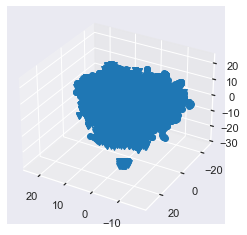

In [127]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=8, min_samples=5).fit(X_tfidf)

plot3d(X, dbscan.labels_, y, mode=TSNE)

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])
score = accuracy_score(y,dbscan.labels_)
print( 'Model Accuracy :', round(score*100,2) )

Model Accuracy : 49.94
